<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap04_file01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Sweeping Parameters

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 2.4 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/chap03.py')

Downloaded chap03.py


In [5]:
from chap03 import step

Functions That Return Values

In [6]:
from numpy import sqrt

root_2 = sqrt(2)
root_2
bikeshare = State(olin=10, wellesley=2)
bikeshare
def add_five(x):
    return x + 5
add_five(3)

8

In [7]:
def run_simulation(p1, p2, num_steps):
    state = State(olin=10, wellesley=2,
                  olin_empty=0, wellesley_empty=0)

    for i in range(num_steps):
        step(state, p1, p2)

    return state

In [8]:
final_state = run_simulation(0.3, 0.2, 60)
print(final_state.olin_empty,
      final_state.wellesley_empty)

0 0


Loops and Arrays

In [9]:
from numpy import linspace

p1_array = linspace(0, 1, 5)
p1_array
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


Sweeping Parameters

In [10]:
p1_array = linspace(0, 0.6, 6)
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    print(p1, final_state.olin_empty)

0.0 0
0.12 0
0.24 0
0.36 7
0.48 10
0.6 7


In [11]:
sweep = SweepSeries()
p1_array = linspace(0, 0.6, 31)

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.olin_empty
show(sweep)

,Metric
Parameter,
0.00,0
0.02,0
0.04,0
0.06,0
0.08,0
0.10,0
0.12,0
0.14,0
0.16,0


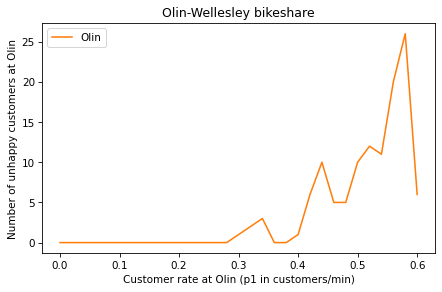

In [12]:
sweep.plot(label='Olin', color='C1')

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers at Olin')

**Exercises**

Exercise 1

In [13]:
def make_state():
  state = State(olin=10, wellesley=2)
inti = make_state()

Exercise 2

In [14]:
from numpy import linspace
np.linspace(0,1, num=101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

Exercise 3

0.0 0
0.02 0
0.04 0
0.06 0
0.08 0
0.1 0
0.12 0
0.14 0
0.16 0
0.18 0
0.2 0
0.22 0
0.24 0
0.26 0
0.28 0
0.3 0
0.32 0
0.34 0
0.36 2
0.38 1
0.4 3
0.42 11
0.44 3
0.46 0
0.48 0
0.5 13
0.52 6
0.54 18
0.56 5
0.58 12
0.6 19


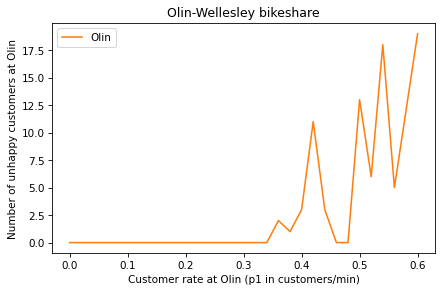

In [15]:
sweep = SweepSeries()
def sweep_p1():
  p1_array = linspace(0, 0.6, 31)
  p2 = 0.2
  num_steps = 60
  for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.olin_empty
    print(p1, final_state.olin_empty)
  sweep.plot(label='Olin', color='C1')
  decorate(title='Olin-Wellesley bikeshare',
          xlabel='Customer rate at Olin (p1 in customers/min)',
          ylabel='Number of unhappy customers at Olin')
sweep_p1()

Exercise 4

0.0 17
0.02 18
0.04 21
0.06 11
0.08 17
0.1 8
0.12 11
0.14 13
0.16 10
0.18 16
0.2 20
0.22 4
0.24 11
0.26 9
0.28 4
0.3 7
0.32 0
0.34 4
0.36 8
0.38 0
0.4 0
0.42 0
0.44 0
0.46 0
0.48 4
0.5 0
0.52 0
0.54 0
0.56 0
0.58 0
0.6 0


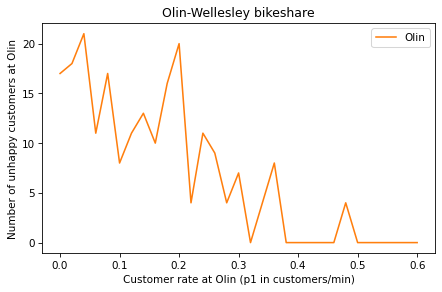

In [16]:
sweep = SweepSeries()
def sweep_p2():
  p1 = 0.5
  p2_array = linspace(0, 0.6, 31)
  num_steps = 60
  for p2 in p2_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p2] = final_state.olin_empty
    print(p2, final_state.olin_empty)
  sweep.plot(label='Olin', color='C1')
  decorate(title='Olin-Wellesley bikeshare',
          xlabel='Customer rate at Olin (p1 in customers/min)',
          ylabel='Number of unhappy customers at Olin')
sweep_p2()